### Name: E.M.D.A. Bandara
### Index No: 190072E

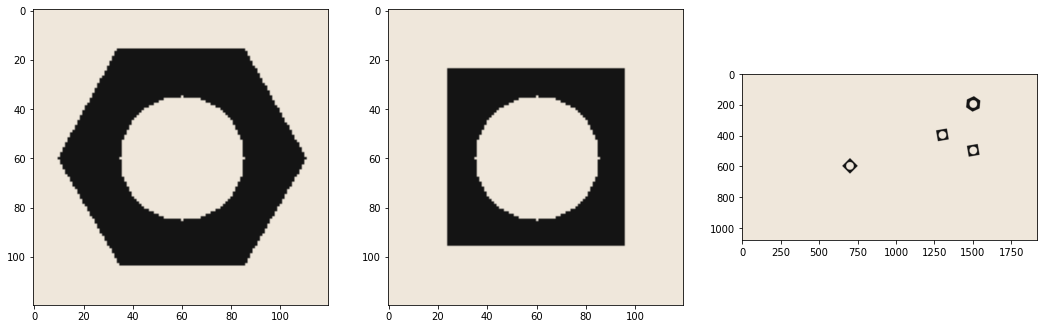

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('images/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('images/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('images/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (18, 6))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()